Name: Anuja Pachwadkar

Roll No: BBCO21159

Assignment 4

Recurrent neural network (RNN) Use the Google stock prices dataset and design a time series analysis and prediction system using RNN.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [ ]:
# Load training data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/Pract 4/Google_Stock_Test (2023).csv')

# Display the first few rows
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900


In [ ]:
# Check dataset info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       143 non-null    object 
 1   Open       143 non-null    float64
 2   High       143 non-null    float64
 3   Low        143 non-null    float64
 4   Close      143 non-null    float64
 5   Adj Close  143 non-null    float64
 6   Volume     143 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
# Ensure 'Close' column is numeric and handle missing values
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')
data = data.dropna()

# Extract 'Close' prices as training data
trainData = data[['Close']].values

# Scale data to the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
trainData = scaler.fit_transform(trainData)

print(f"Training data shape: {trainData.shape}")


Training data shape: (143, 1)


In [ ]:
X_train = []
y_train = []
timestep = 60  # Number of timesteps

# Create sequences
for i in range(timestep, len(trainData)):
    X_train.append(trainData[i-timestep:i, 0])
    y_train.append(trainData[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")



X_train shape: (83, 60)
y_train shape: (83,)


In [ ]:
# Reshape data to fit LSTM input requirements
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(f"Reshaped X_train shape: {X_train.shape}")


Reshaped X_train shape: (83, 60, 1)


In [ ]:
model = Sequential()

# Adding the first LSTM layer with Dropout regularization
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer with Dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Adding a third LSTM layer with Dropout regularization
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer with Dropout regularization
model.add(LSTM(units=100))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,101 (1.08 MB)

 Trainable params: 282,101 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(trainData.shape)


(143, 1)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)


Epoch 1/20
3/3 - 11s - 4s/step - loss: 0.3246
Epoch 2/20
3/3 - 1s - 341ms/step - loss: 0.1047
Epoch 3/20
3/3 - 1s - 196ms/step - loss: 0.0491
Epoch 4/20
3/3 - 1s - 261ms/step - loss: 0.0745
Epoch 5/20
3/3 - 2s - 591ms/step - loss: 0.0265
Epoch 6/20
3/3 - 2s - 532ms/step - loss: 0.0287
Epoch 7/20
3/3 - 2s - 572ms/step - loss: 0.0205
Epoch 8/20
3/3 - 2s - 507ms/step - loss: 0.0213
Epoch 9/20
3/3 - 1s - 204ms/step - loss: 0.0276
Epoch 10/20
3/3 - 1s - 192ms/step - loss: 0.0171
Epoch 11/20
3/3 - 1s - 211ms/step - loss: 0.0170
Epoch 12/20
3/3 - 1s - 205ms/step - loss: 0.0179
Epoch 13/20
3/3 - 1s - 211ms/step - loss: 0.0144
Epoch 14/20
3/3 - 1s - 193ms/step - loss: 0.0167
Epoch 15/20
3/3 - 1s - 203ms/step - loss: 0.0170
Epoch 16/20
3/3 - 1s - 315ms/step - loss: 0.0155
Epoch 17/20
3/3 - 2s - 603ms/step - loss: 0.0147
Epoch 18/20
3/3 - 2s - 684ms/step - loss: 0.0119
Epoch 19/20
3/3 - 1s - 327ms/step - loss: 0.0137
Epoch 20/20
3/3 - 1s - 340ms/step - loss: 0.0161


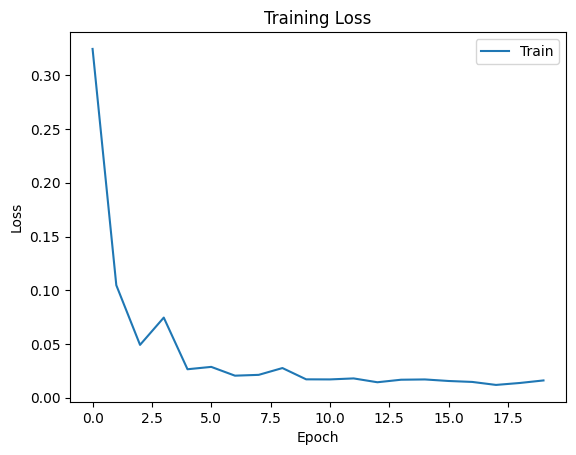

In [ ]:
# Plot training loss
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper right')
plt.show()


In [ ]:
# Load test data
testData =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DL/Pract 4/Google_Stock_Test (2023).csv')

# Ensure 'Close' column is numeric and handle missing values
testData['Close'] = pd.to_numeric(testData['Close'], errors='coerce')
testData = testData.dropna()

# Extract 'Close' prices
testData = testData[['Close']]

# Prepare inputs for the model
inputClosing = testData.values
inputClosing_scaled = scaler.transform(inputClosing)

# Create test sequences
X_test = []
for i in range(timestep, len(inputClosing_scaled)):
    X_test.append(inputClosing_scaled[i-timestep:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(f"X_test shape: {X_test.shape}")


X_test shape: (83, 60, 1)


In [ ]:
# Predicting the stock prices
y_pred_scaled = model.predict(X_test)

# Inverse transform to get actual stock prices
y_pred = scaler.inverse_transform(y_pred_scaled)

# Actual stock prices
y_test = inputClosing[timestep:]

print(f"Predicted prices shape: {y_pred.shape}")
print(f"Actual prices shape: {y_test.shape}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step
Predicted prices shape: (83, 1)
Actual prices shape: (83, 1)


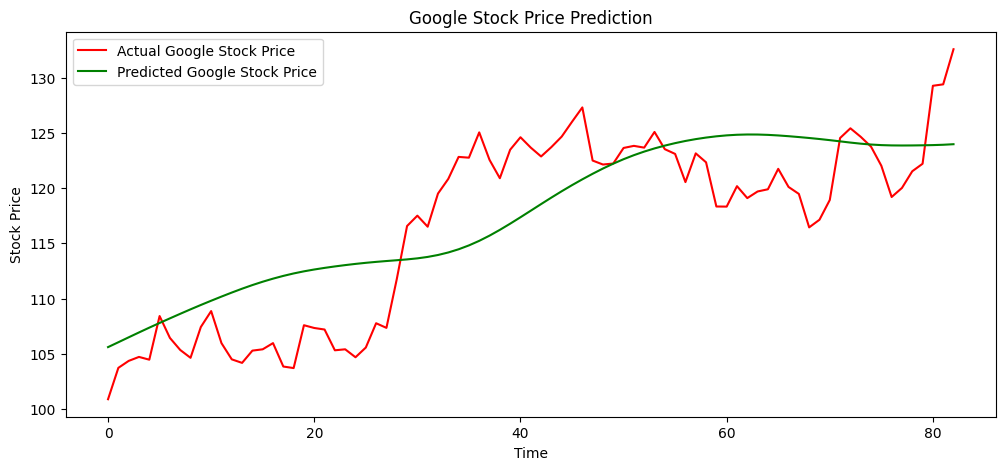

In [ ]:
# Plot actual vs predicted stock prices
plt.figure(figsize=(12, 5))
plt.plot(y_test, color='red', label='Actual Google Stock Price')
plt.plot(y_pred, color='green', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
